In [ ]:
!pip install --pre pycaret

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from pycaret.datasets import get_data
from pycaret.utils import version
from pycaret.time_series import TSForecastingExperiment

In [ ]:
# Load the dataset
data = pd.read_csv('ejakbar.csv')

<Axes: >

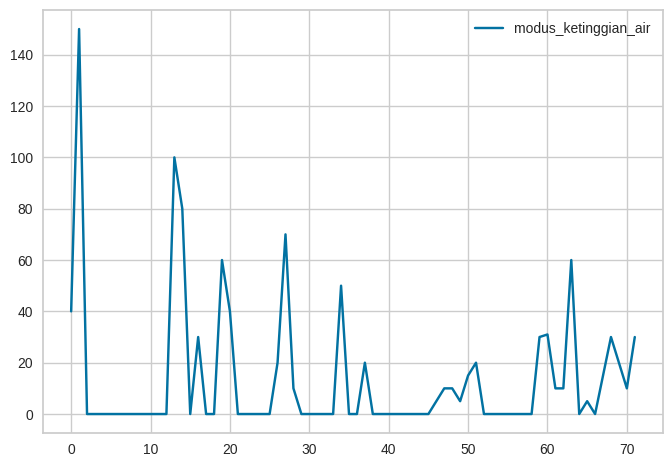

In [ ]:
# plot the dataset
data.plot()

In [ ]:
data.dtypes

date                    object
modus_ketinggian_air     int64
dtype: object

In [ ]:
# change type
data['date'] = pd.to_datetime(data['date'])

In [ ]:
data.dtypes

date                    datetime64[ns]
modus_ketinggian_air             int64
dtype: object

In [ ]:
#set index
data.set_index('date', drop=True, inplace=True)

In [ ]:
data.head()

,modus_ketinggian_air
date,
2015-01-01,40
2015-02-01,150
2015-03-01,0
2015-04-01,0
2015-05-01,0


<Axes: xlabel='date'>

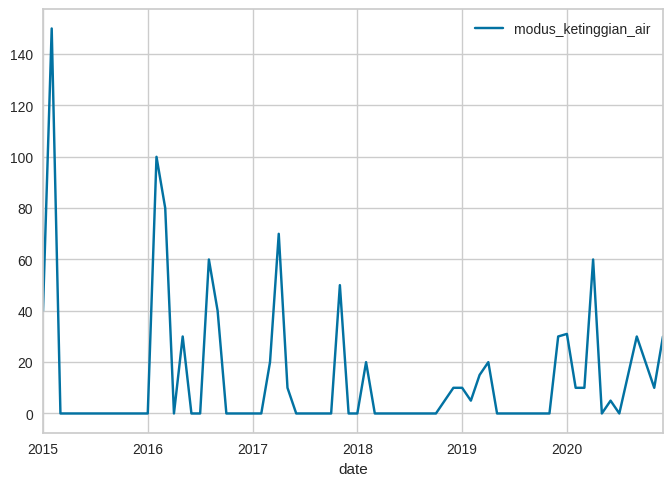

In [ ]:
data.plot()

In [ ]:
data.dtypes

modus_ketinggian_air    int64
dtype: object

In [ ]:
# Check for duplicate index values
duplicate_indices = data.index[data.index.duplicated()]
if len(duplicate_indices) > 0:
    print("Duplicate index values found!")
    print(duplicate_indices)
    # Handle duplicate values here (e.g., remove duplicates or choose appropriate action)
else:
    print("No duplicate index values found.")

No duplicate index values found.


In [ ]:
# Remove duplicate index values
data = data.loc[~data.index.duplicated(keep='first')]
print("Duplicate index values removed.")

Duplicate index values removed.


In [ ]:
# import pycaret time series and init setup
from pycaret.time_series import *
s = setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,modus_ketinggian_air
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(72, 1)"
5,Transformed data shape,"(72, 1)"
6,Transformed train set shape,"(69, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# import TSForecastingExperiment and init the class
from pycaret.time_series import TSForecastingExperiment
exp = TSForecastingExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.time_series.forecasting.oop.TSForecastingExperiment

In [ ]:
# init setup on exp
exp.setup(data, fh = 3, session_id = 123)

,Description,Value
0,session_id,123
1,Target,modus_ketinggian_air
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(72, 1)"
5,Transformed data shape,"(72, 1)"
6,Transformed train set shape,"(69, 1)"
7,Transformed test set shape,"(3, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [ ]:
# check statistical tests on original data
check_stats()

,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,72.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,13.694444
3,Summary,Statistics,Transformed,Median,,0.0
4,Summary,Statistics,Transformed,Standard Deviation,,26.665185
5,Summary,Statistics,Transformed,Variance,,711.032081
6,Summary,Statistics,Transformed,Kurtosis,,10.324637
7,Summary,Statistics,Transformed,Skewness,,2.933313
8,Summary,Statistics,Transformed,# Distinct Values,,14.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",27.508081


In [ ]:
# compare baseline models
best = compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,0.8286,0.6375,13.3512,17.8775,11678529934889470.0000,0.9157,-0.2162,0.0267
stlf,STLF,0.8331,0.5432,13.4201,15.1949,13202672711915214.0000,1.0992,0.0858,0.0733
grand_means,Grand Means Forecaster,0.8506,0.6145,13.7060,17.2256,13160952157811182.0000,0.9309,-0.1018,0.0633
auto_arima,Auto ARIMA,0.8560,0.6474,13.8065,18.1498,11556084249825018.0000,0.9658,-0.2883,4.8433
snaive,Seasonal Naive Forecaster,0.9709,0.7182,15.6667,20.1352,10007999171934436.0000,1.2101,-0.7301,0.1900
naive,Naive Forecaster,1.0037,0.7330,16.2222,20.5773,7505999378950827.0000,1.1730,-0.8585,3.0000
arima,ARIMA,1.0400,0.7496,16.7938,21.0238,9690980723763114.0000,1.5322,-0.9385,0.2500
theta,Theta Forecaster,1.0679,0.8260,17.2790,23.1984,3155911238242094.5000,1.7191,-1.4228,0.0433
polytrend,Polynomial Trend Forecaster,1.0760,0.8294,17.4115,23.2942,3070386327518678.0000,1.7425,-1.4501,0.0500
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.1478,0.8050,18.6046,22.5833,11381404397807606.0000,1.6265,-1.3513,0.3933


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

In [ ]:
# compare models using OOP
exp.compare_models()

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
croston,Croston,0.8286,0.6375,13.3512,17.8775,11678529934889470.0000,0.9157,-0.2162,0.0467
stlf,STLF,0.8331,0.5432,13.4201,15.1949,13202672711915214.0000,1.0992,0.0858,0.1600
grand_means,Grand Means Forecaster,0.8506,0.6145,13.7060,17.2256,13160952157811182.0000,0.9309,-0.1018,0.0467
auto_arima,Auto ARIMA,0.8560,0.6474,13.8065,18.1498,11556084249825018.0000,0.9658,-0.2883,3.2667
snaive,Seasonal Naive Forecaster,0.9709,0.7182,15.6667,20.1352,10007999171934436.0000,1.2101,-0.7301,0.1733
naive,Naive Forecaster,1.0037,0.7330,16.2222,20.5773,7505999378950827.0000,1.1730,-0.8585,0.1000
arima,ARIMA,1.0400,0.7496,16.7938,21.0238,9690980723763114.0000,1.5322,-0.9385,0.1367
theta,Theta Forecaster,1.0679,0.8260,17.2790,23.1984,3155911238242094.5000,1.7191,-1.4228,0.0867
polytrend,Polynomial Trend Forecaster,1.0760,0.8294,17.4115,23.2942,3070386327518678.0000,1.7425,-1.4501,0.0300
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,1.1478,0.8050,18.6046,22.5833,11381404397807606.0000,1.6265,-1.3513,0.3800


Processing:   0%|          | 0/117 [00:00<?, ?it/s]

Croston()

# **Tuning**

In [ ]:
# train a dt model with default params
dt = create_model('rf_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-12,0.9349,0.5507,15.3169,15.7414,1.0756,1.6554,-1.5285
1,2020-03,1.1711,1.0630,18.6442,29.6357,3306541812045586.5000,1.2968,-0.1886
2,2020-06,1.3374,0.8013,21.8526,22.3727,30837671381377228.0000,1.9274,-2.3369
Mean,NaT,1.1478,0.8050,18.6046,22.5833,11381404397807606.0000,1.6265,-1.3513
SD,NaT,0.1651,0.2091,2.6683,5.6743,13823724736617540.0000,0.2582,0.8859


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(dt)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-12,0.4692,0.4374,7.6862,12.5010,0.2802,0.4055,-0.5947
1,2020-03,1.4727,1.0368,23.4459,28.9053,20560239410674612.0000,1.4226,-0.1308
2,2020-06,0.8025,0.5503,13.1122,15.3645,36651368626698456.0000,0.8942,-0.5738
Mean,NaT,0.9148,0.6748,14.7481,18.9236,19070536012457692.0000,0.9074,-0.4331
SD,NaT,0.4173,0.2601,6.5371,7.1543,14999891504352696.0000,0.4153,0.2139


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.9s finished


In [ ]:
dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                        11, 10,
                                                                        9, 8, 7,
                                                                        6, 5, 4,
                                                                        3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=RandomForestRegressor(n_jobs=-1, random_state=123),
                    sp=13, window_length=13)

In [ ]:
# define tuning grid
dt_grid = {'regressor__max_depth' : [None, 2, 4, 6, 8, 10, 12]}

# tune model with custom grid and metric = MAE
tuned_dt = tune_model(dt, custom_grid = dt_grid, optimize = 'MAE')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-12,0.9349,0.5507,15.3169,15.7414,1.0756,1.6554,-1.5285
1,2020-03,1.1711,1.0630,18.6442,29.6357,3306541812045586.5000,1.2968,-0.1886
2,2020-06,1.3374,0.8013,21.8526,22.3727,30837671381377228.0000,1.9274,-2.3369
Mean,NaT,1.1478,0.8050,18.6046,22.5833,11381404397807606.0000,1.6265,-1.3513
SD,NaT,0.1651,0.2091,2.6683,5.6743,13823724736617540.0000,0.2582,0.8859


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 7 candidates, totalling 21 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  21 out of  21 | elapsed:   11.0s finished


In [ ]:
# see tuned_dt params
tuned_dt

BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                        11, 10,
                                                                        9, 8, 7,
                                                                        6, 5, 4,
                                                                        3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=RandomForestRegressor(n_jobs=-1, random_state=123),
                    sp=13, window_length=13)

In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_dt, tuner = tune_model(dt, return_tuner=True)

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,2019-12,0.4692,0.4374,7.6862,12.5010,0.2802,0.4055,-0.5947
1,2020-03,1.4727,1.0368,23.4459,28.9053,20560239410674612.0000,1.4226,-0.1308
2,2020-06,0.8025,0.5503,13.1122,15.3645,36651368626698456.0000,0.8942,-0.5738
Mean,NaT,0.9148,0.6748,14.7481,18.9236,19070536012457692.0000,0.9074,-0.4331
SD,NaT,0.4173,0.2601,6.5371,7.1543,14999891504352696.0000,0.4153,0.2139


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:   12.9s finished


In [ ]:
# model object
tuned_dt

BaseCdsDtForecaster(degree=8,
                    fe_target_rr=[WindowSummarizer(lag_feature={'lag': [13, 12,
                                                                        11, 10,
                                                                        9, 8, 7,
                                                                        6, 5, 4,
                                                                        3, 2,
                                                                        1]},
                                                   n_jobs=1)],
                    regressor=RandomForestRegressor(bootstrap=False, max_depth=7, max_features='sqrt',
                      min_impurity_decrease=0.24151713213135217,
                      n_estimators=193, n_jobs=-1, random_state=123),
                    sp=26, window_length=15)

In [ ]:
# tuner object
tuner

# **Plot Model**

In [ ]:
# plot forecast
plot_model(dt, plot = 'forecast')

In [ ]:
# plot forecast for 36 months in future
plot_model(dt, plot = 'forecast', data_kwargs = {'fh' : 63})

# **Predict no tuning**

In [ ]:
# predict on test set
holdout_pred = predict_model(best)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,Croston,0.5589,0.3973,9.0929,10.9383,0.4040,0.4978,-0.7947


In [ ]:
# show predictions df
holdout_pred.head()

,y_pred
2020-10,12.7213
2020-11,12.7213
2020-12,12.7213


In [ ]:
# generate forecast for 60 period in future
predict_model(best, fh = 63)

,y_pred
2020-10,12.7213
2020-11,12.7213
2020-12,12.7213
2021-01,12.7213
2021-02,12.7213
...,...
2025-08,12.7213
2025-09,12.7213
2025-10,12.7213
2025-11,12.7213


## **Predict with tuning **

In [ ]:
# predict on test set
holdout_pred = predict_model(dt)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,RandomForestRegressor,1.1502,0.7027,18.7108,19.3448,1.0071,1.7314,-4.6133


In [ ]:
# show predictions df
holdout_pred.head()

,y_pred
2020-10,-1.9311
2020-11,-1.7704
2020-12,7.5690


In [ ]:
# generate forecast for 60 period in future
predict_model(dt, fh = 63)

,y_pred
2020-10,-1.9311
2020-11,-1.7704
2020-12,7.5690
2021-01,8.3413
2021-02,14.0586
...,...
2025-08,-8.2619
2025-09,-1.8898
2025-10,-5.8601
2025-11,18.9197


# **save**

In [ ]:
# Generate forecasts for 63 periods in the future (including current data)
forecast_df = predict_model(dt, fh=63)

# Modify the forecasted values by replacing negative values with zero
forecast_df['y_pred'] = forecast_df['y_pred'].clip(lower=0)

# Extract the relevant columns for the forecast
#forecast_data = forecast_df[['date', 'modus_ketinggian_air', 'Label']]

# Save the modified forecast as CSV
#forecast_data.to_csv('forecast_results.csv', index=False

In [ ]:
forecast_df

,y_pred
2020-10,0.0000
2020-11,0.0000
2020-12,7.5690
2021-01,8.3413
2021-02,14.0586
...,...
2025-08,0.0000
2025-09,0.0000
2025-10,0.0000
2025-11,18.9197


In [ ]:
# Save the modified forecast as CSV
forecast_df.to_csv('Jakarta_Barat.csv', index=False)